# Ceneo Analyzer

# Biblioteki

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


# Lista Kodów produktów o których zostały pobrane opinie

In [2]:
print(*[filename.split(".")[0] for filename in os.listdir('opinions')], sep='\n')


111261978
114700014


# Kod produkto do analizy

In [3]:
product_id = input("Proszę podać ID produktu: ")

# Wczytanie do obiektu pandas. DataFrame opiniio wskazanym produkcie

In [4]:
opinions = pd.read_json(f'opinions/{product_id}.json')
opinions.rating = opinions.rating.apply(lambda r: r.split("/")[0].replace(",","."), ).astype(float)
opinions.recommendation = opinions.recommendation.apply(lambda r: "Brak rekomendacji" if r is None else r)


# Podstawowe Statystyki zbioru opinii

In [5]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.apply(lambda p: 1 if p else 0).sum()
cons_count = opinions.cons.apply(lambda c: 1 if c else 0).sum()
average_rating = opinions.rating.mean()

# Histogram częstości poszczególnych ocen produktu

In [6]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.5,0.5), fill_value = 0)
rating_distribution

rating
0.0     0
0.5     2
1.0     2
1.5     0
2.0     0
2.5     1
3.0     2
3.5     0
4.0     2
4.5     6
5.0    80
Name: count, dtype: int64

[Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '6'),
 Text(0, 0, '80')]

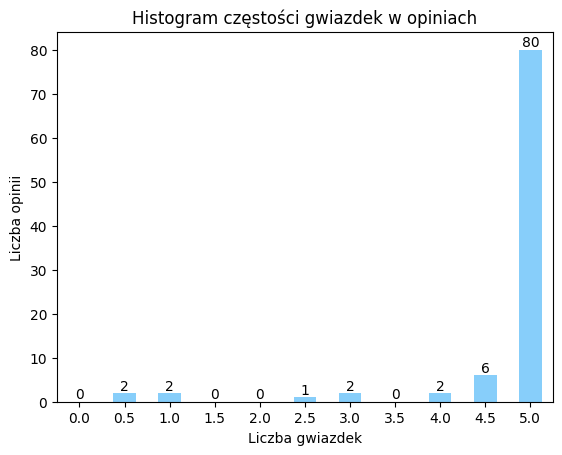

In [7]:
fig, ax = plt.subplots()
rating_distribution.plot.bar(color = "lightskyblue")
plt.title("Histogram częstości gwiazdek w opiniach")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=0)
plt.bar_label(ax.containers[0], label_type='edge')

# Udział poszczególnych rekomendacji w opiniach o produkcie

In [8]:
recommendations_distribution = opinions.recommendation.value_counts().reindex(["Polecam", "Nie polecam", "Brak rekomendacji"])
recommendations_distribution

recommendation
Polecam              88
Nie polecam           5
Brak rekomendacji     2
Name: count, dtype: int64

Text(0.5, 1.0, 'Udział rekomendacji w opiniach')

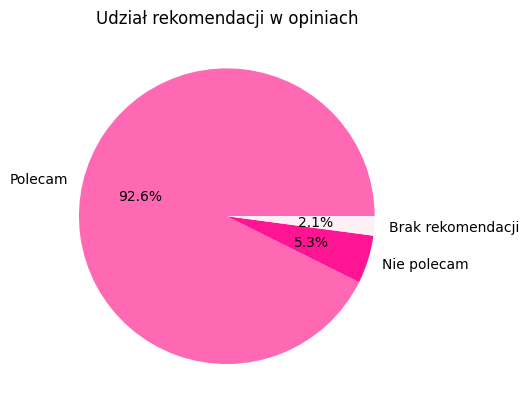

In [9]:
recommendations_distribution.plot.pie(
    colors = ["hotpink", "deeppink",  "lavenderblush"],
    autopct = "%1.1f%%",
    label = ""
)
plt.title("Udział rekomendacji w opiniach")